## Feature scaling 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/3_08/homeprices.csv')
data.head(20)

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2


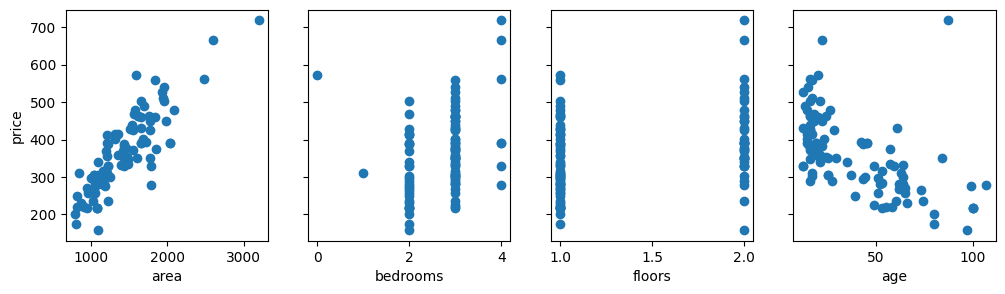

In [2]:
X_train = np.array(data.iloc[:, 0:4])
X_features = ['area', 'bedrooms', 'floors', 'age']
y_train = np.array(data.iloc[:, 4]) # 'price'

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("price")
plt.show()

# Increasing size also increases price. 
# Number of bedrooms and floors don't seem to have strong impact on price. 
# Newer houses have higher prices than older ones.

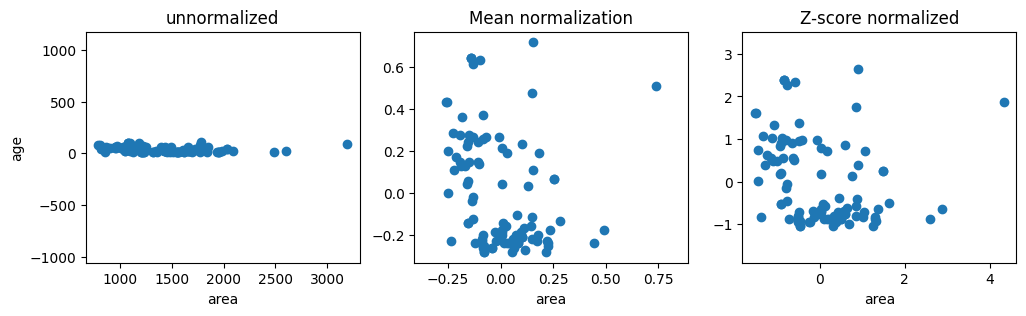

In [3]:
# find the mean of each feature (i.e. per column) with shape (n,)
mu = np.mean(X_train, axis=0) 
# find the standard deviation of each feature (i.e. per column) with shape (n,)
sigma = np.std(X_train, axis=0) 
# max value per column/feature with shape (n,)
maxv = np.max(X_train, axis=0)
# min value per column/feature with shape (n,)
minv = np.min(X_train, axis=0)
# element-wise, apply mean normalization per feature/column
X_mean = (X_train - mu)/(maxv - minv)
# element-wise, apply z-score normalization per feature/column
X_znorm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); 
ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')
ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]);  
ax[1].set_title("Mean normalization")
ax[1].axis('equal')
ax[2].scatter(X_znorm[:,0], X_znorm[:,3])
ax[2].set_xlabel(X_features[0]); 
ax[2].set_title("Z-score normalized")
ax[2].axis('equal') 
plt.show()